# Predicting Stock Market With Machine Learning

In [1]:
import os
import pandas as pd

dataset = dict()

for root, dirs, files in os.walk("Datasets"):
    for file in files:
        if file.endswith(".csv"):
            dataname = file.split('.')[0]
            dataset[dataname] = pd.read_csv(os.path.join(root, file))

feature1 = ['Open', 'High', 'Low', 'Close', 'Volume']
feature2 = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI']

dataset['AppleStock_Year1'].head()

,Date,Close,High,Low,Open,Volume,Target,SMA_5,SMA_10,EMA_5,EMA_10,RSI
0,2024-01-22,192.480438,193.909972,190.862283,190.902001,60133900,193.761063,186.710696,185.520407,188.315401,186.374689,66.056890
1,2024-01-23,193.761063,194.326926,192.420886,193.602237,42355600,193.085999,189.003897,186.475415,190.130622,187.717666,67.679825
2,2024-01-24,193.085999,194.952336,192.927158,193.999308,53631300,192.758408,191.350708,187.404611,191.115747,188.693726,69.508961
3,2024-01-25,192.758408,194.843147,191.706116,193.800777,54822100,191.021118,192.450656,188.196809,191.663301,189.432759,75.267971
4,2024-01-26,191.021118,193.344103,190.544612,192.857675,44594000,190.336151,192.621405,188.874843,191.449240,189.721552,72.231035


# XGBoost

After the testing the model with the random forest, we are going to try and test it with an XGBoost model, which through research seems to be basically random forest but more advanced. We'll see if this model will show a more promising result than random forest.

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

features = dataset['AppleStock_Year1'][feature2]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgboost_model.fit(x_train_xgb, y_train_xgb)

xgboost_predictions = xgboost_model.predict(x_test_xgb)

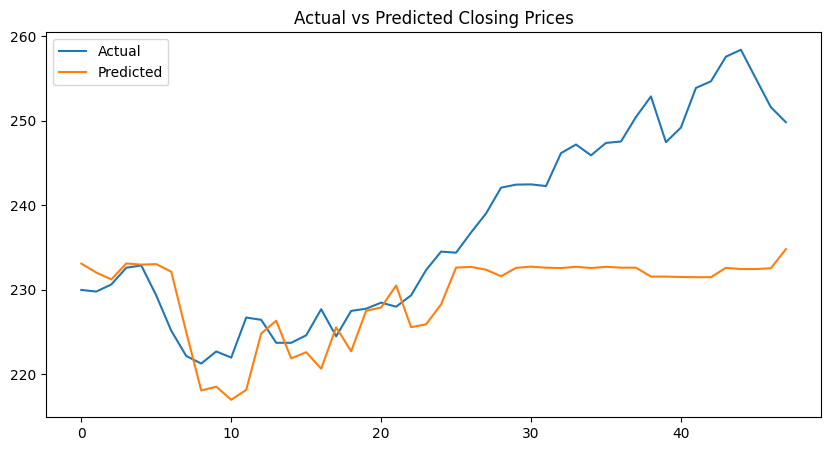

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_xgb.values, label='Actual')
plt.plot(xgboost_predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_xgb, xgboost_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_xgb, xgboost_predictions)

print("XGBoost Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Random Forest Model Performance:
Mean Squared Error = 138.64
Root Mean Squared Error = 11.77
R2 Score = -0.08
